<a href="https://colab.research.google.com/github/solinabasak/Clustering_the_feedbacks_from_Turkiye_Student_Evaluation_dataset/blob/main/Clustering_the_feedbacks_from_Turkiye_Student_Evaluation_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Libraries

In [ ]:
pip install scikit-learn-extra

     |████████████████████████████████| 1.7 MB 4.3 MB/s 
     |████████████████████████████████| 23.2 MB 1.6 MB/s 
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1


In [ ]:
pip install kmodes

In [ ]:
pip install fuzzy-c-means

     |████████████████████████████████| 10.1 MB 5.3 MB/s 
     |████████████████████████████████| 15.7 MB 61 kB/s 
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninstalled numpy-1.19.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [ ]:
pip install sklearn-som

In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn_extra.cluster import KMedoids
from fcmeans import FCM
from sklearn_som.som import SOM
from kmodes.kmodes import KModes
from collections import Counter as count

**Read Data**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/turkiye-student-evaluation_generic.csv')

In [ ]:
df.shape

(5820, 33)

In [ ]:
df.head(5)

,instr,class,nb.repeat,attendance,difficulty,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28
0,1,2,1,0,4,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
1,1,2,1,1,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
2,1,2,1,2,4,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5
3,1,2,1,1,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
4,1,2,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [ ]:
px.histogram(df, x='class', color="difficulty", barmode='group')


In [ ]:
px.histogram(df, x='difficulty', color="attendance", barmode='group')

In [ ]:
px.histogram(df, x='difficulty', color="nb.repeat", barmode='group')


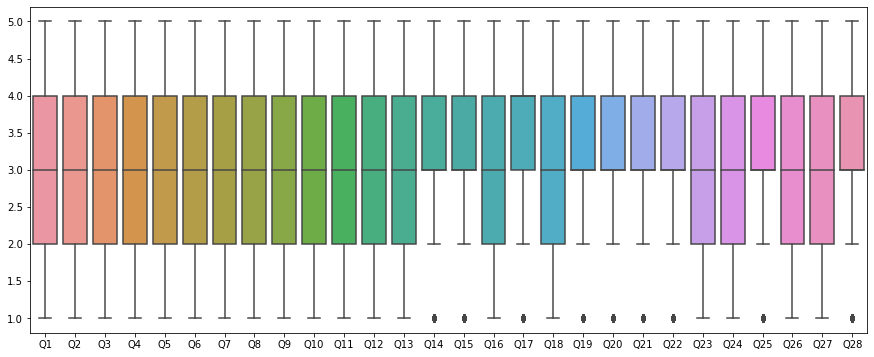

In [ ]:
plt.figure(figsize=(15,6))
sns.boxplot(data=df.loc[:,'Q1':'Q28'])
plt.show()

In [ ]:
data = df.loc[:,'Q1':'Q28']

In [ ]:
data_stats = data.describe()

In [ ]:
data.head()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28
0,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
1,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
2,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5
3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
4,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [ ]:
scaler=StandardScaler()
features=scaler.fit_transform(data.values)
print("Before the feature selection: ", features.shape)
pca = PCA(n_components = 2) # for feature selection
features = pca.fit_transform(features)
print("After the feature selection: ", features.shape)

Before the feature selection:  (5820, 28)
After the feature selection:  (5820, 2)


# K Mean Clustering

In [ ]:
sse = []
class_labels = []
kmeancluster = []
for k in range(1,10):
    print("No of Cluster: ", k)
    print("-"*100)
    kmeans = KMeans(n_clusters=k, random_state=2021).fit(features)
    class_labels.append(kmeans.labels_)
    print("Cluster Center:\n", kmeans.cluster_centers_)
    kmeancluster.append(kmeans.cluster_centers_)
    print("SSE: ", kmeans.inertia_)
    sse.append(kmeans.inertia_)
    print("-"*100)

No of Cluster:  1
----------------------------------------------------------------------------------------------------
Cluster Center:
 [[-5.81985777e-15  3.24415943e-16]]
SSE:  141390.03503316274
----------------------------------------------------------------------------------------------------
No of Cluster:  2
----------------------------------------------------------------------------------------------------
Cluster Center:
 [[-4.18554095 -0.02539775]
 [ 3.55511629  0.02157235]]
SSE:  54784.461900730836
----------------------------------------------------------------------------------------------------
No of Cluster:  3
----------------------------------------------------------------------------------------------------
Cluster Center:
 [[ 7.29055654  0.24150688]
 [-4.77521479  0.1652916 ]
 [ 0.70778747 -0.28167788]]
SSE:  23705.150565642798
----------------------------------------------------------------------------------------------------
No of Cluster:  4
-----------------------

# Elbow Method for choosing optimal K value

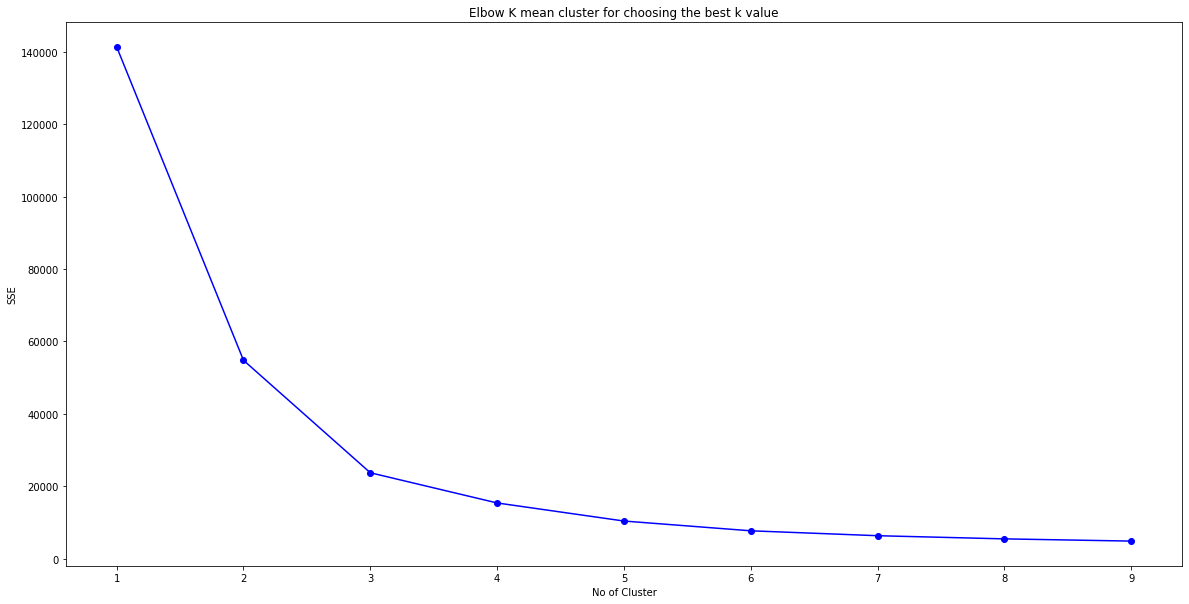

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.figure(figsize = (20,10))
plt.plot(range(1, 10), sse, "bo-")
plt.xlabel("No of Cluster")
plt.ylabel("SSE")
plt.title("Elbow K mean cluster for choosing the best k value")
plt.show()
plt.savefig("Elbow K mean.png")

In [ ]:
# from the elbow method we are choosing the 4 as the no of cluster centers
print("K MEAN: SSE:", sse[3])
print("K MEAN: Silhouette Score for 4 cluster centers:", silhouette_score(features, class_labels[3]))
print("K-MEAN: Cluster Center: \n", kmeancluster[3])

K MEAN: SSE: 15359.195818906082
K MEAN: Silhouette Score for 4 cluster centers: 0.6014247641313798
K-MEAN: Cluster Center: 
 [[ 1.07431623 -0.18951523]
 [-7.09699703  0.32460977]
 [ 7.36680187  0.24979591]
 [-3.0066185  -0.10830166]]


plotting the data samples to visulaize the data sagments cluster wise

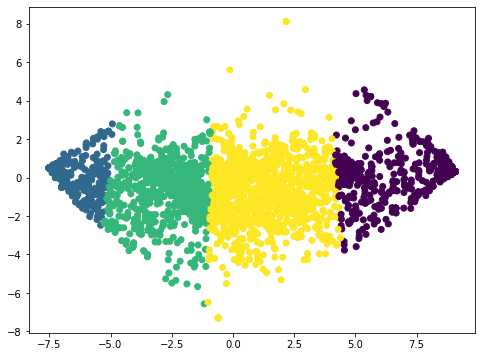

In [ ]:
kmeans = KMeans(n_clusters = 4, random_state = 42)
y_pred = kmeans.fit_predict(features)
plt.figure(figsize=(8, 6))
plt.scatter(features[:,0], features[:,1], c = kmeans.labels_.astype(float))
plt.savefig("kmean.png")
plt.show()

# K Medoids (PAM)

In [ ]:
kmedoids = KMedoids(n_clusters = 4, random_state = 42)
patterns_cluster_no = kmedoids.fit_predict(features)
print("k-Medoids: The sse: ", kmedoids.inertia_)
print("k-Medoids: Silhouette Score: ", silhouette_score(features, kmedoids.labels_))
print("k-Medoids: Cluster Medoids:\n", kmedoids.cluster_centers_)

k-Medoids: The sse:  8588.758908930922
k-Medoids: Silhouette Score:  0.49963123320843233
k-Medoids: Cluster Medoids:
 [[ 0.78287487  0.4050173 ]
 [-3.35946227  0.45324548]
 [-1.20214038 -1.70372215]
 [ 9.06754915  0.30856096]]


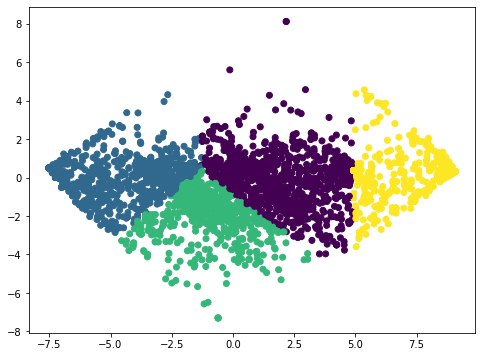

In [ ]:
plt.figure(figsize = (8, 6))
plt.scatter(features[:,0], features[:,1], c = kmedoids.labels_.astype(float))
plt.savefig("kmedoids.png")
plt.show()

# Fuzzy C Mean

In [ ]:
def SSE(center, X, cluster, k):
  sse_cost = 0
  for i in range(k):
    pattern = []
    for j in range(0, X.shape[0]):
      if(i == cluster[j]):
        pattern.append(j)
    for j in range(len(pattern)):
      sse_cost = sse_cost + np.linalg.norm(X[pattern[j]] - center[i])**2
  return sse_cost

In [ ]:
m = [1.34, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2]
sse, sc, fcmc = [], [], []
for i in range(0, len(m)):
  print("For m = ", m[i])
  print("-"*100)
  fcm = FCM(n_clusters = 4, m = m[i])
  fcm.fit(features)
  fcm_centers = fcm.centers
  fcmc.append(fcm_centers)
  fcm_labels = fcm.predict(features)
  sse.append(SSE(fcm_centers, features, fcm_labels, 4))
  sc.append(silhouette_score(features, fcm_labels))
  print("FCM: The sse: ", SSE(fcm_centers, features, fcm_labels, 4))
  print("FCM: Silhouette Score ", silhouette_score(features, fcm_labels))
  print("-"*100)
  #print("k-Medoids: Cluster Medoids:\n", kmedoids.cluster_centers_)

For m =  1.34
----------------------------------------------------------------------------------------------------
FCM: The sse:  18352.224482800455
FCM: Silhouette Score  0.5623498648329324
----------------------------------------------------------------------------------------------------
For m =  1.4
----------------------------------------------------------------------------------------------------
FCM: The sse:  18358.723086909213
FCM: Silhouette Score  0.5623498648329324
----------------------------------------------------------------------------------------------------
For m =  1.5
----------------------------------------------------------------------------------------------------
FCM: The sse:  18376.27653934582
FCM: Silhouette Score  0.5624681554036455
----------------------------------------------------------------------------------------------------
For m =  1.6
----------------------------------------------------------------------------------------------------
FCM: The sse:

plotting m vs sse and m vs Silhouette Score

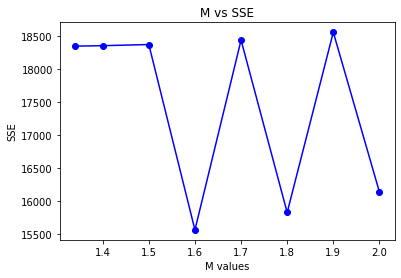

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.plot(m, sse, "bo-")
plt.xlabel("M values")
plt.ylabel("SSE")
plt.title("M vs SSE")
plt.show()
plt.savefig("M vs SSE.png")

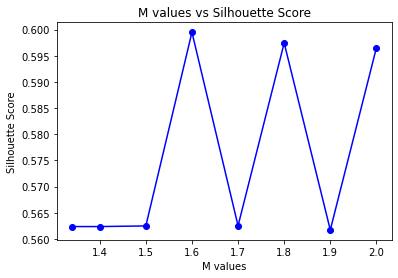

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.plot(m, sc, "bo-")
plt.xlabel("M values")
plt.ylabel("Silhouette Score")
plt.title("M values vs Silhouette Score")
plt.show()
plt.savefig("M vs Silhouette Score.png")

**From the two plots we can see that at 1.6(m=1.6) we are getting a min SSE and max Silhouette Score.(Therefor we will take the value of m=1.6)**

In [ ]:
print("FCM: The sse: ", sse[2])
print("FCM: Silhouette Score ", sc[2])
print("FCM: Cluster Center:\n", fcmc[2])

FCM: The sse:  18376.27653934582
FCM: Silhouette Score  0.5624681554036455
FCM: Cluster Center:
 [[-4.88275521  0.1990048 ]
 [ 0.37298547 -0.13696873]
 [ 4.29397991 -0.22229233]
 [ 8.78659518  0.36103488]]


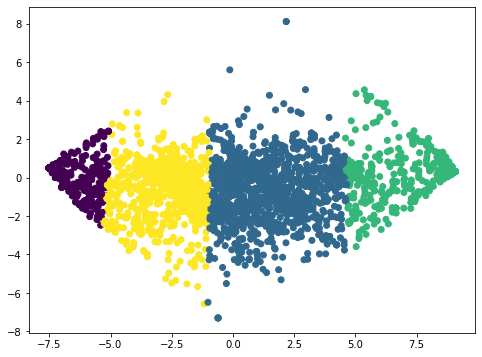

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(features[:,0], features[:,1], c = fcm.predict(features).astype(float))
plt.savefig("fcm.png")
plt.show()

# Self Organizing Map (SOM) with only 1D output space

In [ ]:
"""
dim: The dimensionality (number of features) of the input space.
m: The shape along dimension 0 (vertical) of the SOM
n: The shape along dimesnion 1 (horizontal) of the SOM.
"""
som = SOM(m = 4, n = 1, dim = 2)
som.fit(features)
som_labels = som.predict(features)
print("SOM: The sse: ", SSE(som.cluster_centers_, features, som_labels, 4))
print("SOM: Silhouette Score ", silhouette_score(features, som_labels))
print("SOM: Cluster Center:\n", som.cluster_centers_)

SOM: The sse:  24616.1278244987
SOM: Silhouette Score  0.5488398550158445
SOM: Cluster Center:
 [[[-4.83931207 -0.1297401 ]]

 [[-2.23867633 -0.39316262]]

 [[ 1.5298642  -0.0780462 ]]

 [[ 5.42947561  0.12885104]]]


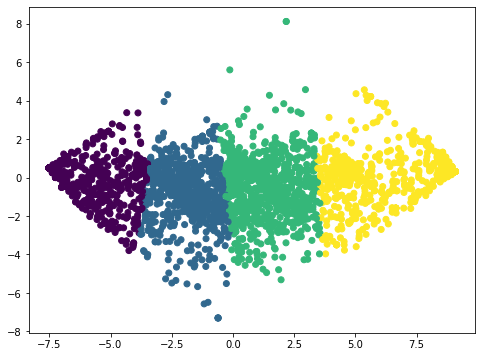

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(features[:,0], features[:,1], c=som.predict(features).astype(float))
plt.savefig("SOM.png")
plt.show()